# Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
milk = pd.read_csv('../DataSet/monthly-milk-production.csv',index_col='Month')

In [3]:
milk.head()

,Milk Production
Month,
1962-01-01 01:00:00,589.0
1962-02-01 01:00:00,561.0
1962-03-01 01:00:00,640.0
1962-04-01 01:00:00,656.0
1962-05-01 01:00:00,727.0


In [4]:
milk.index = pd.to_datetime(milk.index)

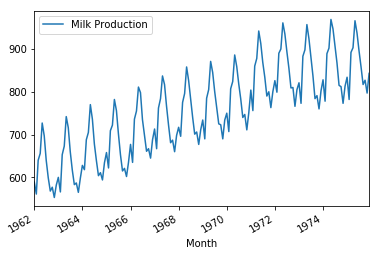

In [5]:
milk.plot()

In [7]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 01:00:00 to 1975-12-01 01:00:00
Data columns (total 1 columns):
Milk Production    168 non-null float64
dtypes: float64(1)
memory usage: 2.6 KB


In [8]:
train_set = milk.head(156)

In [9]:
test_set = milk.tail(12)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [12]:
train_scaled = scaler.fit_transform(train_set)

In [13]:
test_scaled = scaler.transform(test_set)

In [14]:
def next_batch(training_data,batch_size,steps):
    
    
    # Grab a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [15]:
import tensorflow as tf

In [16]:
# Just one feature, the time series
num_inputs = 1
# Num of steps in each batch
num_time_steps = 12
# 100 neuron layer, play with this
num_neurons = 100
# Just one output, predicted time series
num_outputs = 1

## You can also try increasing iterations, but decreasing learning rate
# learning rate you can play with this
learning_rate = 0.03 
# how many iterations to go through (training steps), you can play with this
num_train_iterations = 4000
# Size of the batch of data
batch_size = 1

In [17]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [18]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicLSTMCell(num_units=num_neurons, activation=tf.nn.relu),
    output_size=num_outputs) 


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.


In [19]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [20]:
loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

In [21]:
init = tf.global_variables_initializer()

In [22]:
saver = tf.train.Saver()

In [23]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

In [24]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

0 	MSE: 0.14655663
100 	MSE: 0.010203279
200 	MSE: 0.009426813
300 	MSE: 0.011821927
400 	MSE: 0.009164442
500 	MSE: 0.009291048
600 	MSE: 0.02001011
700 	MSE: 0.0070487238
800 	MSE: 0.016023476
900 	MSE: 0.008557584
1000 	MSE: 0.009918213
1100 	MSE: 0.0063590803
1200 	MSE: 0.013278864
1300 	MSE: 0.006834842
1400 	MSE: 0.007569592
1500 	MSE: 0.009931454
1600 	MSE: 0.007673575
1700 	MSE: 0.0074939057
1800 	MSE: 0.008024582
1900 	MSE: 0.009196974
2000 	MSE: 0.0067326515
2100 	MSE: 0.0064294827
2200 	MSE: 0.0058072438
2300 	MSE: 0.0053782575
2400 	MSE: 0.009547888
2500 	MSE: 0.006005989
2600 	MSE: 0.0042408197
2700 	MSE: 0.010910757
2800 	MSE: 0.0057327435
2900 	MSE: 0.0035325561
3000 	MSE: 0.014779083
3100 	MSE: 0.011041899
3200 	MSE: 0.0040990813
3300 	MSE: 0.008202717
3400 	MSE: 0.011041985
3500 	MSE: 0.009983517
3600 	MSE: 0.0065643615
3700 	MSE: 0.0024339284
3800 	MSE: 0.0041535483
3900 	MSE: 0.005474666


In [25]:
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


In [26]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [27]:
train_seed

[array([0.66105769]),
 array([0.54086538]),
 array([0.80769231]),
 array([0.83894231]),
 array([1.]),
 array([0.94711538]),
 array([0.85336538]),
 array([0.75480769]),
 array([0.62980769]),
 array([0.62259615]),
 array([0.52884615]),
 array([0.625]),
 0.58977526,
 0.6343625,
 0.69294655,
 0.7060437,
 0.75555223,
 0.71340007,
 0.6878593,
 0.60464364,
 0.5465956,
 0.51504564,
 0.47740552,
 0.4822074]

In [28]:
results = scaler.inverse_transform(np.array(train_seed[12:]).reshape(12,1))

In [29]:
test_set

,Milk Production
Month,
1975-01-01 01:00:00,834.0
1975-02-01 01:00:00,782.0
1975-03-01 01:00:00,892.0
1975-04-01 01:00:00,903.0
1975-05-01 01:00:00,966.0
1975-06-01 01:00:00,937.0
1975-07-01 01:00:00,896.0
1975-08-01 01:00:00,858.0
1975-09-01 01:00:00,817.0


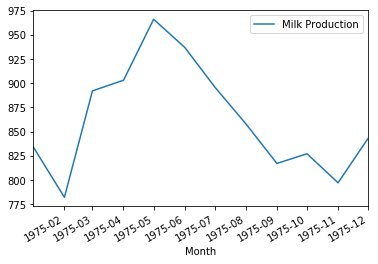

In [30]:
test_set.plot()